## <span style="color:Fuchsia">SPRINT 8</span>

## <span style="color:Fuchsia">Nivell 1</span>


Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.

### <span style="color:fuchsia">Exercici 0 (N1): Primero configuramos la conexión con la Base de Datos en MySql</span>

<span style="color:orange">importamos Pandas, Numpy, y Matplotlib, Seaborn y Plotly como librerías de Gráficos</span>

Pandas (con Matplotlib) → colormap='viridis' o color=['#hex1', '#hex2']

Seaborn → palette='coolwarm' o palette=["#hex1", "#hex2"]

Matplotlib → cmap='plasma' o plt.rc('axes', prop_cycle=cycler(color=['#hex1', '#hex2']))

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


<span style="color:orange">importamos paletas de colores y chusmiamos sus posibilidades</span>

In [281]:
for x in plt.colormaps():
    print(x)

magma
inferno
plasma
viridis
cividis
twilight
twilight_shifted
turbo
berlin
managua
vanimo
Blues
BrBG
BuGn
BuPu
CMRmap
GnBu
Greens
Greys
OrRd
Oranges
PRGn
PiYG
PuBu
PuBuGn
PuOr
PuRd
Purples
RdBu
RdGy
RdPu
RdYlBu
RdYlGn
Reds
Spectral
Wistia
YlGn
YlGnBu
YlOrBr
YlOrRd
afmhot
autumn
binary
bone
brg
bwr
cool
coolwarm
copper
cubehelix
flag
gist_earth
gist_gray
gist_heat
gist_ncar
gist_rainbow
gist_stern
gist_yarg
gnuplot
gnuplot2
gray
hot
hsv
jet
nipy_spectral
ocean
pink
prism
rainbow
seismic
spring
summer
terrain
winter
Accent
Dark2
Paired
Pastel1
Pastel2
Set1
Set2
Set3
tab10
tab20
tab20b
tab20c
grey
gist_grey
gist_yerg
Grays
magma_r
inferno_r
plasma_r
viridis_r
cividis_r
twilight_r
twilight_shifted_r
turbo_r
berlin_r
managua_r
vanimo_r
Blues_r
BrBG_r
BuGn_r
BuPu_r
CMRmap_r
GnBu_r
Greens_r
Greys_r
OrRd_r
Oranges_r
PRGn_r
PiYG_r
PuBu_r
PuBuGn_r
PuOr_r
PuRd_r
Purples_r
RdBu_r
RdGy_r
RdPu_r
RdYlBu_r
RdYlGn_r
Reds_r
Spectral_r
Wistia_r
YlGn_r
YlGnBu_r
YlOrBr_r
YlOrRd_r
afmhot_r
autumn_r
binary_

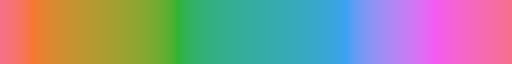

In [282]:
sns.color_palette("husl", as_cmap=True)  # Muestra una paleta como colormap


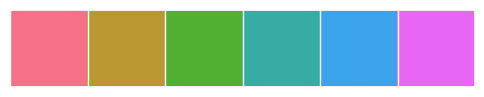

In [283]:
sns.palplot(sns.color_palette("husl"))

<span style="color:orange">Importamos mysql.connector y abrimos la conexión a la base de datos, creamos un DataFrame donde vamos a importar las tablas que están en la Base de datos en MySql, y cerramos la conexión con la Base de Datos</span>

In [284]:

import mysql.connector


In [285]:

# Conectar a la base de datos
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Sociodata25!",
    database="transtrans"
)

cursor = conn.cursor()


cursor.execute("SHOW TABLES")
tablas = [tabla[0] for tabla in cursor.fetchall()]

diccionario_df = {}

for tabla in tablas:
    query = f"SELECT * FROM {tabla}"
    df = pd.read_sql(query, conn)  # Leer la tabla como DataFrame
    diccionario_df[tabla] = df  # Guardar en el diccionario

# Cerrar conexión
cursor.close()
conn.close()

# Mostrar los DataFrames generados
for nombre, df in diccionario_df.items():
    print(f"Tabla: {nombre}")
    #print(df.to_string())  # Muestra las primeras filas de cada tabla
   


Tabla: card_status
Tabla: companies
Tabla: credit_cards
Tabla: products
Tabla: products_transactions
Tabla: transactions
Tabla: users


C:\Users\lulaz\AppData\Local\Temp\ipykernel_62508\4243604928.py:19: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



<span style="color:orange">creamos los DataFrames para cada Tabla</span>

In [286]:
df_users = diccionario_df["users"]
df_products = diccionario_df["products"]
df_transactions = diccionario_df['transactions']
df_products_transactions = diccionario_df['products_transactions']
df_credit_cards = diccionario_df['credit_cards']
df_card_status = diccionario_df['card_status']
df_companies= diccionario_df['companies']


In [287]:
df_transtocompanies= df_transactions.merge(df_companies, left_on='business_id', right_on='company_id', how='inner')
df_transtocompanies


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,company_id,company_name,phone,email,country,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500,b-2250,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560,b-2618,Non Institute,06 77 15 31 14,amet.metus@protonmail.couk,United Kingdom,https://guardian.co.uk/settings\r
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980,b-2346,Ut Semper Foundation,01 60 36 33 06,consectetuer@google.ca,Sweden,https://ebay.com/settings\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135,b-2390,Neque Tellus Imperdiet Corp.,09 15 42 22 11,vestibulum.ante.ipsum@aol.edu,Ireland,https://whatsapp.com/sub/cars\r
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715,b-2494,Malesuada PC,01 74 85 68 70,cras.lorem.lorem@outlook.com,Ireland,https://yahoo.com/fr\r
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r


In [323]:
df_products_to_companies

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,price,colour,weight,warehouse_id,company_id,company_name,phone,email,country,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,161.11,#7c7c7c,1.0,WH-4\r,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,60.33,#3f3f3f,0.6,WH--14\r,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,103.73,#424242,2.7,WH--66\r,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
3,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,...,59.80,#5b5b5b,0.6,WH--38\r,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
4,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,...,82.15,#919191,2.7,WH--42\r,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715,...,114.09,#848484,1.0,WH--68\r,b-2494,Malesuada PC,01 74 85 68 70,cras.lorem.lorem@outlook.com,Ireland,https://yahoo.com/fr\r
1453,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460,...,26.66,#aaaaaa,1.0,WH--32\r,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
1454,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,...,169.96,#545454,2.7,WH--18\r,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
1455,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,...,59.80,#5b5b5b,0.6,WH--38\r,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r


### <span style="color:Fuchsia">Exercici 1 (N1):  Una variable numèrica.</span>

Con Pandas:

<Axes: title={'center': 'box de precios'}>

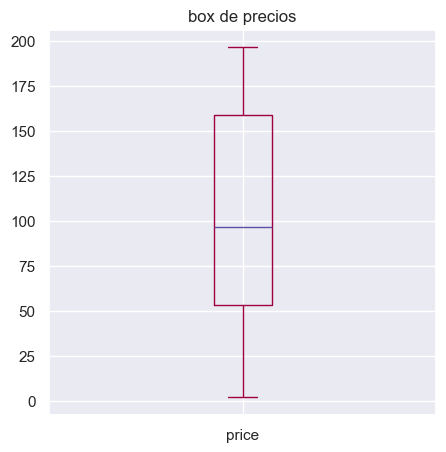

In [289]:
df_products["price"].plot.box(cmap='Spectral', figsize=(5,5), title='box de precios')


Con Pandas también podemos tomar una sola variable numérica y representar su distribución en la muestra (la cantidad de columnas que elijamos subdividirá la muestra). En este caso la hemos dividido en 10.

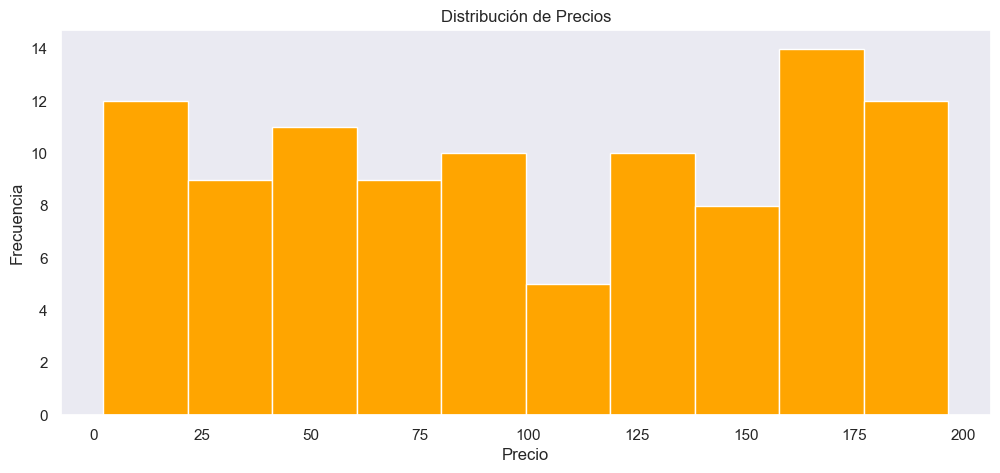

In [290]:
df_products["price"].plot(kind="hist", bins=10, color="orange", figsize=(12,5), title="Distribución de Precios")

plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.grid()
plt.show()

### <span style="color:Fuchsia">Exercici 2 (N1): Dues variables numèriques.</span>


En este gráfico podemos ver la distribución del precio y del peso de los productos. Para poder interpretar mejor esta distribución se agregó un 'lmplot' cuya linea nos indica que a mayor precio, mayor peso de los productos.

Text(0.5, 1.0, 'Peso x precio')

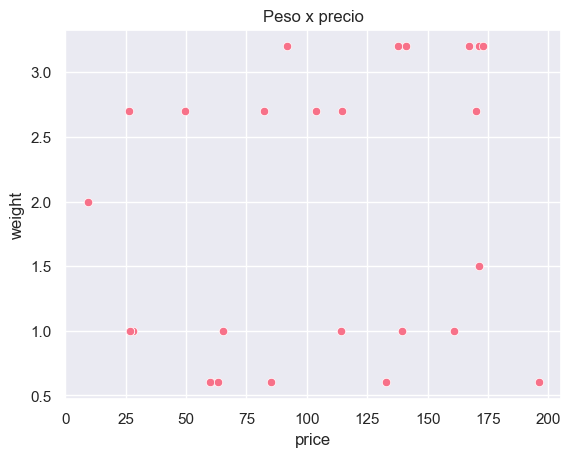

In [291]:
sns.scatterplot(data=df_numericas, x='price', y='weight')
sns.set_theme(style='darkgrid')
sns.set_palette("husl")
plt.title('Peso x precio')



Text(0.5, 1.0, 'Peso x precio')

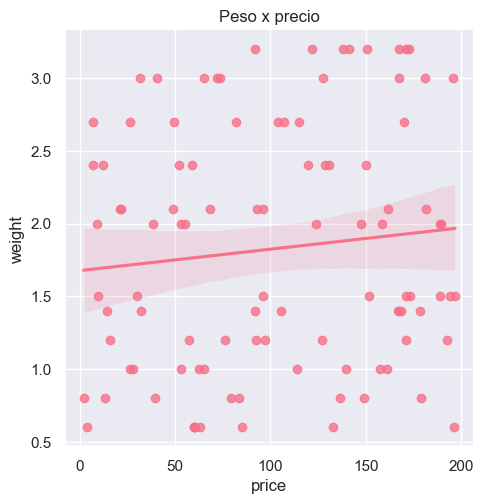

In [292]:
sns.lmplot(data=df_products, x="price", y="weight")
sns.set_palette("husl")
plt.title('Peso x precio')


Con puro Matplotlib

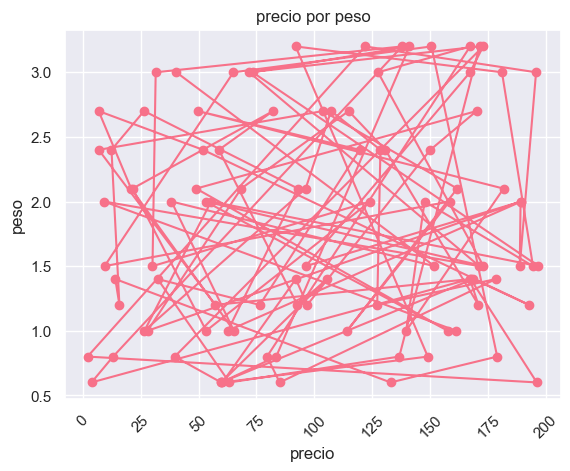

In [293]:
plt.plot(df_products['price'], df_products['weight'], marker='o', linestyle='-')
plt.xlabel('precio')
plt.ylabel('peso')
plt.title('precio por peso')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si son fechas
plt.show()

### <span style="color:fuchsia">Exercici 3 (N1): Una Variable Categórica </span>

Con Pandas y seteo mediante matplotlib. 

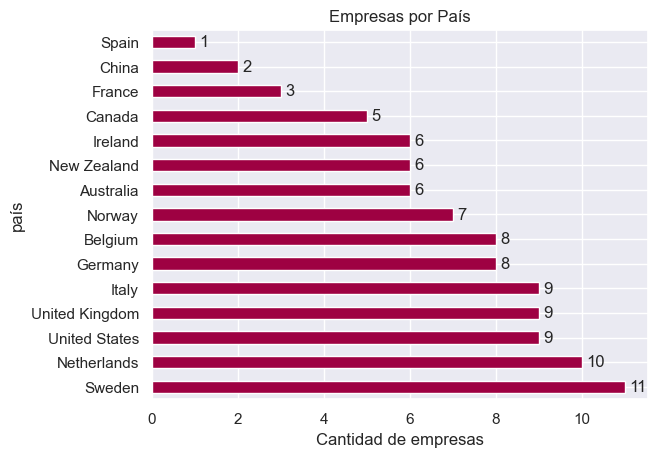

In [294]:
df_companies['country'].value_counts().plot.barh(cmap='Spectral')

#generamos las etiquetas de valores
for index, value in enumerate(df_companies['country'].value_counts()):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=12)
    
plt.xlabel("Cantidad de empresas")
plt.ylabel("país")
plt.title("Empresas por País")
plt.show()

Otro Pandas, con Seaborn y Matplotlib que pensé que no me iba a poder llevar al Power BI pero al final sí :D

Text(0.5, 1.0, 'Usuarios por País')

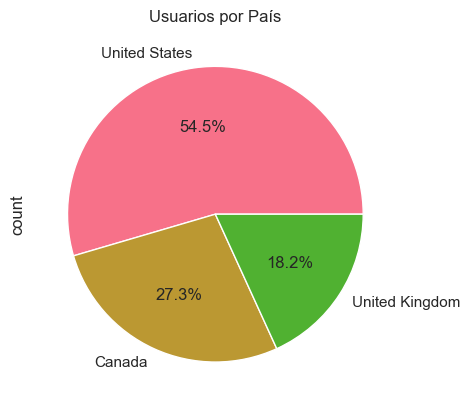

In [295]:
df_users['country'].value_counts().plot.pie(autopct='%1.1f%%')
sns.set_palette("husl")
plt.title("Usuarios por País")

Perdón, voy a armar otro con seaborn para poder llevármelo al Power Bi después

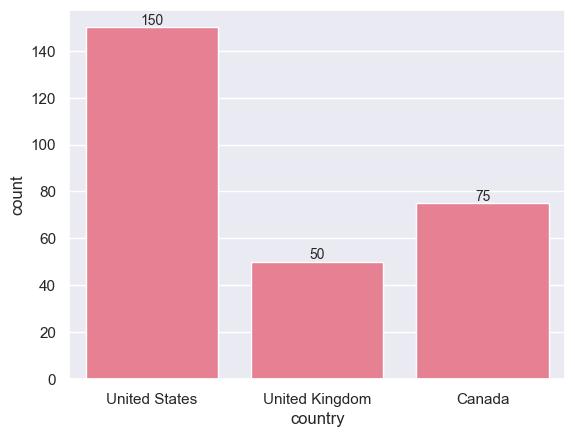

In [296]:
ax = sns.countplot(data=df_users, x='country')

# Agregar etiquetas en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

### <span style="color:Fuchsia">Exercici 4 (N1): Una variable categòrica i una numèrica.</span>


In [325]:
df_transtocompanies= df_transactions.merge(df_companies, left_on='business_id', right_on='company_id', how='inner')


In [326]:
df_transtocompanies

,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,company_id,company_name,phone,email,country,website
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500,b-2250,Amet Nulla Donec Corporation,07 15 25 14 74,mattis.integer.eu@protonmail.net,Italy,https://netflix.com/sub/cars\r
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560,b-2618,Non Institute,06 77 15 31 14,amet.metus@protonmail.couk,United Kingdom,https://guardian.co.uk/settings\r
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980,b-2346,Ut Semper Foundation,01 60 36 33 06,consectetuer@google.ca,Sweden,https://ebay.com/settings\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135,b-2390,Neque Tellus Imperdiet Corp.,09 15 42 22 11,vestibulum.ante.ipsum@aol.edu,Ireland,https://whatsapp.com/sub/cars\r
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715,b-2494,Malesuada PC,01 74 85 68 70,cras.lorem.lorem@outlook.com,Ireland,https://yahoo.com/fr\r
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r


In [298]:
df_montosporpais= df_transtocompanies.groupby("country")["amount"].sum().reset_index().sort_values(by="amount", ascending=False)

df_montosporpais

,country,amount
5,Germany,28815.98
13,United Kingdom,27073.17
12,Sweden,20588.59
10,Norway,17286.71
6,Ireland,17193.12
2,Canada,16448.52
14,United States,5256.05
8,Netherlands,4554.32
7,Italy,3427.03
1,Belgium,2965.92


Creamos un código que nos resetee el Index y nos cree un nuevo Dataframe para poder trabajar con la tabla

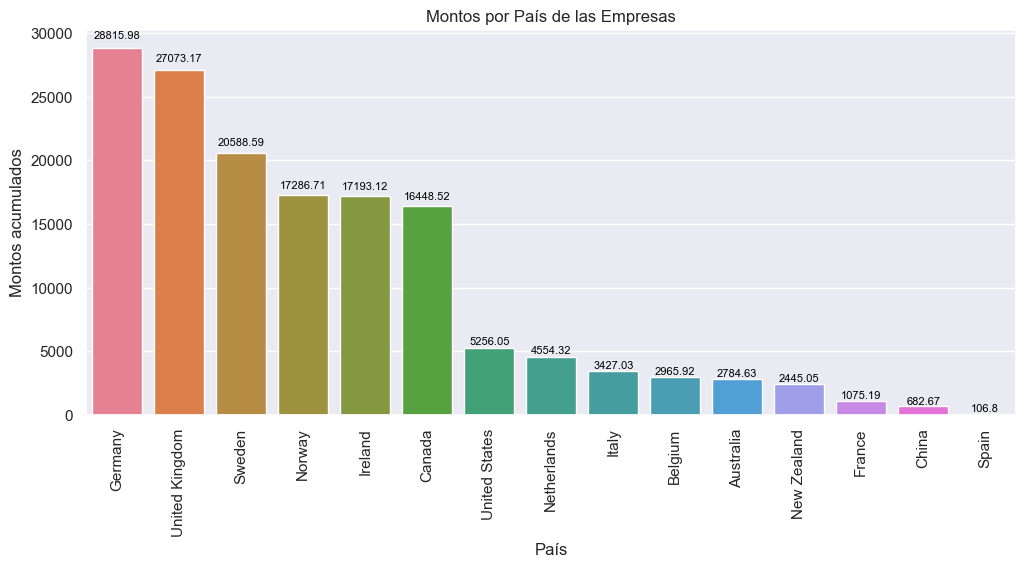

In [299]:

plt.figure(figsize=(12, 5))
fig= sns.barplot(data=df_montosporpais.sort_values(by="amount", ascending=False), x= 'country', y="amount", hue='country', palette='husl', legend=False)

for index, value in enumerate(df_montosporpais.sort_values(by="amount", ascending=False)["amount"]):
    fig.text(index, value + (value * 0.02), str(round(value, 2)), 
            ha='center', va='bottom', fontsize=8, color='black')


plt.xticks(rotation=90)  
plt.xlabel("País")
plt.ylabel("Montos acumulados")
plt.title('Montos por País de las Empresas')
plt.show()


Agregamos la categoría Continente para 'jugar' un poco con nuestro plotly (sí, serían tres variables -dos categóricas y una numérica- pero me dejé fluir ;)

In [300]:

df_montosporpais["Continente"] = "" 

for index, row in df_montosporpais.iterrows():
    country = row["country"]  # Extraer el país

    if country in ['Belgium', 'France', 'Germany', 'Ireland', 'Italy', 'Netherlands','Norway', 'Spain', 'Sweden', 'United Kingdom']:
        df_montosporpais.at[index, 'Continente'] = 'Europe'
        
    elif country in ['Australia', 'New Zealand']:
        df_montosporpais.at[index, 'Continente'] = 'Oceania'
        
    elif country in ['Canada', 'United States']:
        df_montosporpais.at[index, 'Continente'] = 'North America'
    
    elif country in ['China']:
        df_montosporpais.at[index, 'Continente'] = 'Asia'
    else:
        df_montosporpais.at[index, 'Continente'] = 'Sin Clasificación'
        

df_montosporpais




,country,amount,Continente
5,Germany,28815.98,Europe
13,United Kingdom,27073.17,Europe
12,Sweden,20588.59,Europe
10,Norway,17286.71,Europe
6,Ireland,17193.12,Europe
2,Canada,16448.52,North America
14,United States,5256.05,North America
8,Netherlands,4554.32,Europe
7,Italy,3427.03,Europe
1,Belgium,2965.92,Europe


Generamos un df_montos por continente para corroborar lo que vamos a hacer en el siguiente gráfico

In [301]:
df_montosporcontinente= df_montosporpais.groupby('Continente')['amount'].sum().reset_index()
df_montosporcontinente

,Continente,amount
0,Asia,682.67
1,Europe,123086.83
2,North America,21704.57
3,Oceania,5229.68


Mirá que lindo el plotly, ojo

In [302]:
import plotly.express as px

px.sunburst(df_montosporpais, path=['Continente', 'country', 'amount'], values= 'amount', hover_data='amount')


Graficamos un Histograma analizando los amounts de cada continente y distinguido por país. Quedó piola ;)

In [303]:
df_montosporpais

px.histogram(df_montosporpais, x="amount", y="Continente", color="country", title='Montos por Continente')

### <span style="color:fuchsia">Exercici 5 (N1): Dos Variables Categóricas </span>

Vamos a analizar la relación entre los países de los usuarios y los países de las empresas. Realizamos un merge que integre el df_users al df_products_to_companies

In [304]:
df_users_to_companies= df_transtocompanies.merge(df_users, left_on='user_id', right_on='id', how='inner')

df_users_to_companies


,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,id_y,name,surname,phone_y,email_y,birth_date,country_y,city,postal_code,address
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,92,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,...,170,William,Benjamin,0800 1111,porttitor@icloud.ca,"May 15, 1987",United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560,...,265,Chloe,Keith,022-178-1548,arcu.eu@protonmail.org,"Jan 10, 1999",Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St."
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980,...,92,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135,...,272,Hedwig,Gilbert,064-204-8788,sem.eget@icloud.edu,"Apr 16, 1991",Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road"
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715,...,250,Hilda,Levy,088-867-5267,et.libero@yahoo.org,"Dec 21, 1994",Canada,Baddeck,B4R 5C5,"P.O. Box 306, 6953 At Street"
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460,...,223,Linus,Willis,056-347-2535,ultrices.posuere@yahoo.couk,"Mar 23, 1992",Canada,Lourdes,B0R 4L1,6491 Cursus St.
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,...,185,Molly,Gilliam,0800 120 8023,donec@outlook.couk,"Dec 21, 1993",United Kingdom,Banchory,U8H 7PH,"P.O. Box 202, 5638 Mi Rd."


Muy amable el displot para su configuración, hay que decirlo

Text(13.090851658950628, 0.5, 'Transacciones')

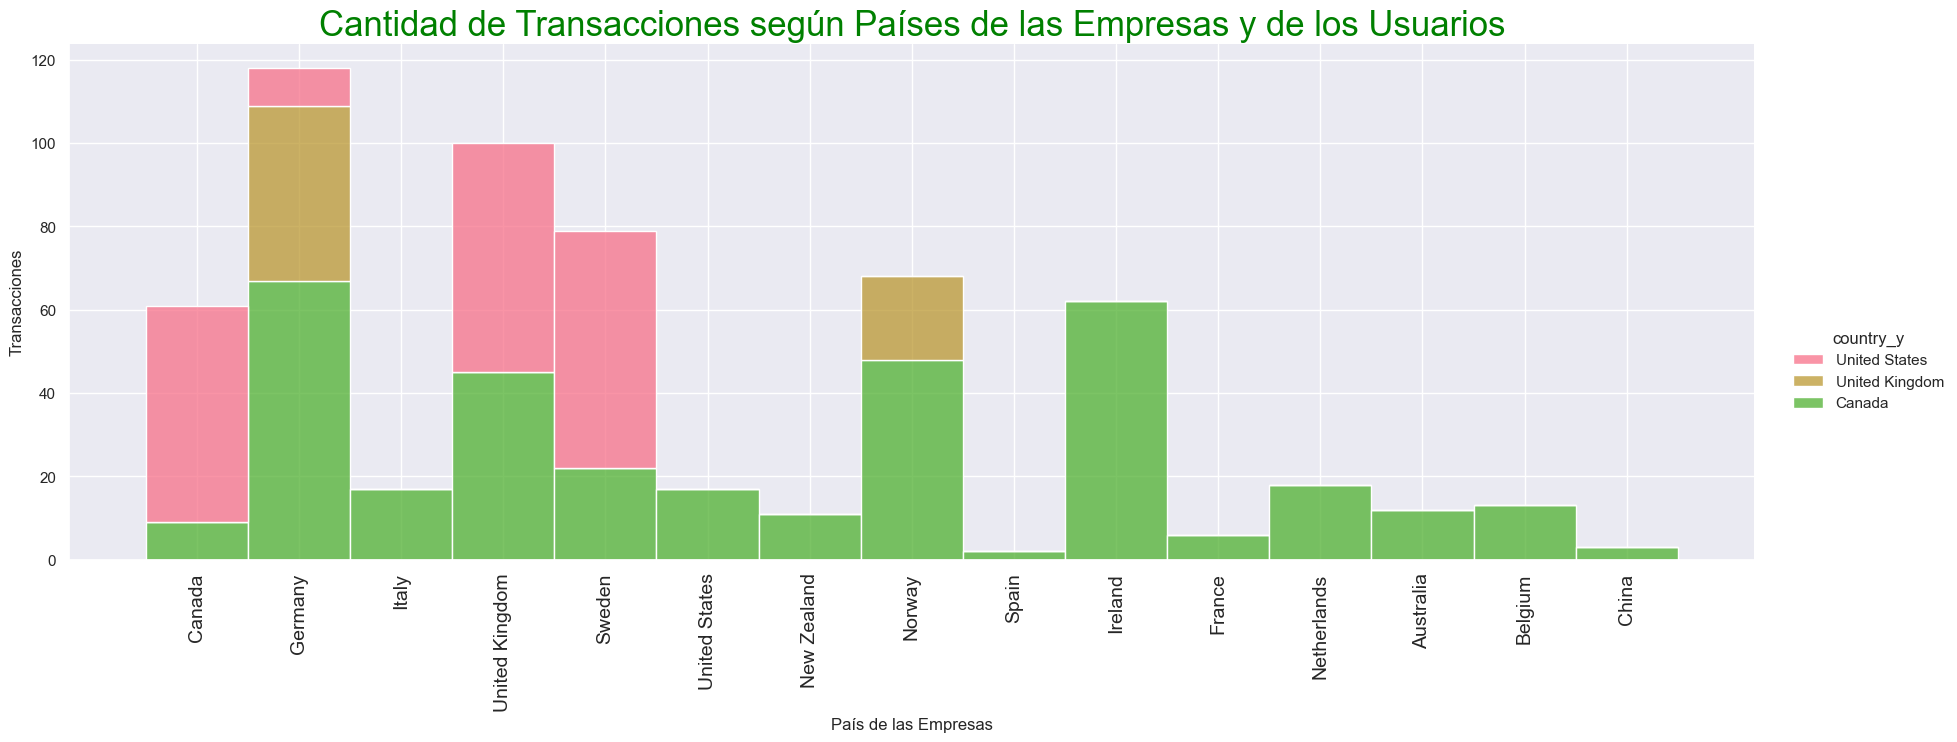

In [305]:
sns.displot(data=df_users_to_companies, x='country_x', hue='country_y', multiple="stack", height=6, aspect=18/6)


sns.set_palette("husl")
plt.title("Cantidad de Transacciones según Países de las Empresas y de los Usuarios", fontsize=25, color='green')
plt.xticks(rotation=90, fontsize=14)
plt.xlabel("País de las Empresas")
plt.ylabel("Transacciones")



Aquí podemos ver de dónde proviene la demanda hacia las empresas de cada país, observando que la clientela de muchos países se concentra únicamente en Canadá, mientras que las empresas de Alemania son las únicas que cuentan con una clientela diversificada en los tres países consumidores. 

### <span style="color:fuchsia">Exercici 6 (N1): Tres variables </span>


Realizamos un gráfico de barras que nos indica los montos aceptados y declinados por país de las empresas. 

Text(0.5, 1.0, 'Montos efectivos y declinados según países de las Empresas')

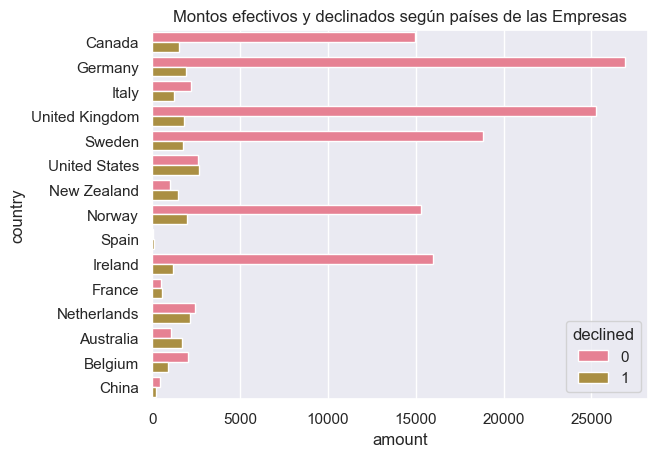

In [306]:
sns.barplot(data=pd.merge(df_transactions, df_companies, how='inner', left_on='business_id', right_on='company_id'), 
            x='amount', 
            y='country', 
            hue='declined', errorbar=None, estimator='sum')
sns.set_palette("husl")
plt.title("Montos efectivos y declinados según países de las Empresas")


In [308]:
df_users_to_companies["Continente"] = "" 

for index, row in df_users_to_companies.iterrows():
    country_company = row["country_x"]  # Extraer el país

    if country_company in ['Belgium', 'France', 'Germany', 'Ireland', 'Italy', 'Netherlands','Norway', 'Spain', 'Sweden', 'United Kingdom']:
        df_users_to_companies.at[index, 'Continente'] = 'Europe'
        
    elif country_company in ['Australia', 'New Zealand']:
        df_users_to_companies.at[index, 'Continente'] = 'Oceania'
        
    elif country_company in ['Canada', 'United States']:
        df_users_to_companies.at[index, 'Continente'] = 'North America'
    
    elif country_company in ['China']:
        df_users_to_companies.at[index, 'Continente'] = 'Asia'
    else:
        df_users_to_companies.at[index, 'Continente'] = 'Sin Clasificación'
    
df_users_to_companies

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,name,surname,phone_y,email_y,birth_date,country_y,city,postal_code,address,Continente
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,...,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",North America
1,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,...,William,Benjamin,0800 1111,porttitor@icloud.ca,"May 15, 1987",United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.,Europe
2,063FBA79-99EC-66FB-29F7-25726D1764A5,CcU-2987,b-2250,2022-01-06 21:25:27,92.61,0,"47, 67, 31, 5",275,-81.22270,-129.0500,...,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.,Europe
3,0668296C-CDB9-A883-76BC-2E4C44F8C8AE,CcU-3743,b-2618,2022-01-26 02:07:14,394.18,0,"89, 83, 79",265,-34.35930,-100.5560,...,Chloe,Keith,022-178-1548,arcu.eu@protonmail.org,"Jan 10, 1999",Canada,Oliver,B5T 7L6,"P.O. Box 289, 3192 Cursus St.",Europe
4,06CD9AA5-9B42-D684-DDDD-A5E394FEBA99,CcU-2959,b-2346,2021-10-26 23:00:01,279.93,0,"43, 31",92,33.73810,158.2980,...,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St.",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,FD2E8957-414B-BEEC-E9AD-59AA7A8A6290,CcU-3232,b-2390,2022-03-13 00:27:34,78.29,0,"83, 7, 17, 89",272,-24.31950,-11.4135,...,Hedwig,Gilbert,064-204-8788,sem.eget@icloud.edu,"Apr 16, 1991",Canada,Tuktoyaktuk,Q4C 3G7,"P.O. Box 496, 5145 Sapien Road",Europe
583,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715,...,Hilda,Levy,088-867-5267,et.libero@yahoo.org,"Dec 21, 1994",Canada,Baddeck,B4R 5C5,"P.O. Box 306, 6953 At Street",Europe
584,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460,...,Linus,Willis,056-347-2535,ultrices.posuere@yahoo.couk,"Mar 23, 1992",Canada,Lourdes,B0R 4L1,6491 Cursus St.,Europe
585,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,...,Molly,Gilliam,0800 120 8023,donec@outlook.couk,"Dec 21, 1993",United Kingdom,Banchory,U8H 7PH,"P.O. Box 202, 5638 Mi Rd.",Europe


In [309]:
fig= px.treemap(df_users_to_companies, path=[px.Constant('Empresas por Territorio'), 'Continente', 'country_x', 'company_name'], values='amount',
                  color='amount', hover_data=['amount'], title='Facturación de las Empresas por Territorio')
fig.data[0].textinfo='label+value'
fig.show()

### <span style="color:fuchsia">Exercici 7 (N1): Graficar un Pairplot</span>

Este Pairplot pobrecito no nos dice mucho, las variables numéricas tienen muy poca correlación y se puede ver en lo contingente de las distribuciones. A su vez, el dato no puede ser íntegro puesto que al tener cada transacción varios productos, esto multiplica el valor de los 'amounts' tantas veces como productos se hayan vendido en la misma.

In [ ]:
df_merged_trans_products=df_transactions.merge(df_products_transactions, left_on='id', right_on='transaction_id', how='inner')

df_transtoproducts= df_merged_trans_products.merge(df_products, left_on='product_id', right_on='id', how='inner')

df_transtoproducts


,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,transaction_id,product_id,id_y,product_name,price,colour,weight,warehouse_id
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,02C6201E-D90A-1859-B4EE-88D2986D3B02,1,1,Direwolf Stannis,161.11,#7c7c7c,1.0,WH-4\r
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,02C6201E-D90A-1859-B4EE-88D2986D3B02,19,19,dooku solo,60.33,#3f3f3f,0.6,WH--14\r
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.91850,-12.5276,02C6201E-D90A-1859-B4EE-88D2986D3B02,71,71,Tully Dorne,103.73,#424242,2.7,WH--66\r
3,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,0466A42E-47CF-8D24-FD01-C0B689713128,43,43,duel,59.80,#5b5b5b,0.6,WH--38\r
4,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.96950,-117.5250,0466A42E-47CF-8D24-FD01-C0B689713128,47,47,Tully,82.15,#919191,2.7,WH--42\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,FD89D51B-AE8D-77DC-E450-B8083FBD3187,CcU-3960,b-2494,2022-03-16 02:35:05,200.72,0,"3, 2, 73, 1",250,8.01217,-64.6715,FD89D51B-AE8D-77DC-E450-B8083FBD3187,73,73,Dorne bastard,114.09,#848484,1.0,WH--68\r
1453,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,CcU-4331,b-2302,2021-06-13 11:41:17,42.32,0,37,223,-77.86050,-172.3460,FD9CBCCD-8E1E-8DA1-4606-7E3A6F3A5A65,37,37,Direwolf Littlefinger,26.66,#aaaaaa,1.0,WH--32\r
1454,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,FE809ED4-2DB6-55AC-C915-929516E4646B,23,23,riverlands north,169.96,#545454,2.7,WH--18\r
1455,FE809ED4-2DB6-55AC-C915-929516E4646B,CcU-4849,b-2302,2021-11-09 21:35:40,219.83,0,"23, 43",185,-46.07510,-142.2420,FE809ED4-2DB6-55AC-C915-929516E4646B,43,43,duel,59.80,#5b5b5b,0.6,WH--38\r


In [ ]:
df_numericas=df_transtoproducts[['price', 'amount', 'weight']]


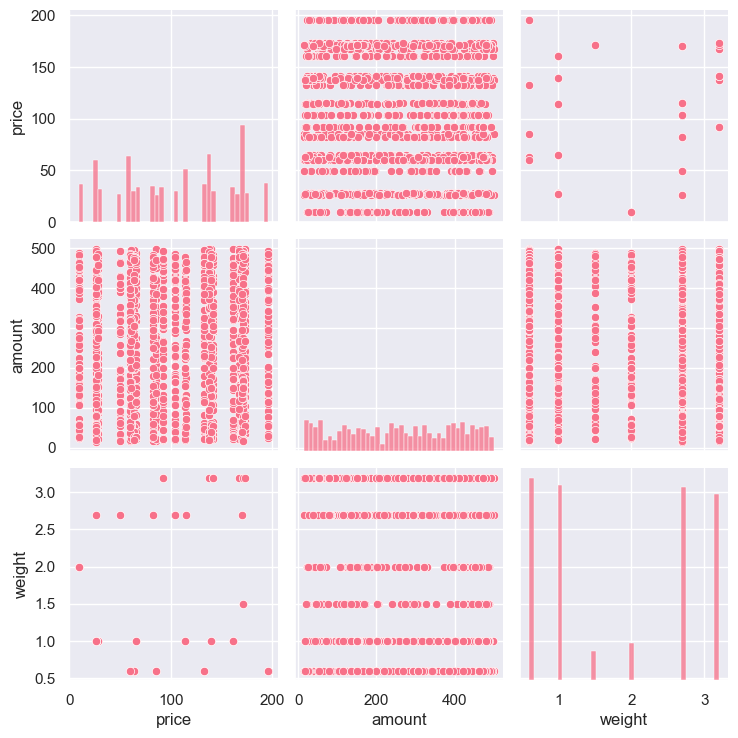

In [340]:
sns.pairplot(df_numericas, diag_kws={'bins':40});
sns.set_palette("husl")


#### <span style="color:seagreen">Así terminamos el Nivell 1:</span>
### <span style="color:seagreen">https://www.youtube.com/shorts/p8YKBvHPLEs</span>


## <span style="color:Fuchsia">Nivell 2</span>

###  <span style="color:Fuchsia">Exercici 1: Correlació de totes les variables numèriques.</span>

In [ ]:
df_numericas.sort_values('price')

,price,amount,weight
1450,9.24,200.72,2.0
61,9.24,388.04,2.0
1129,9.24,25.78,2.0
493,9.24,22.92,2.0
525,9.24,143.24,2.0
...,...,...,...
1022,195.94,233.47,0.6
1071,195.94,368.86,0.6
1133,195.94,280.34,0.6
1081,195.94,283.97,0.6


CORRELACIONES ENTRE LAS VARIABLES NUMÉRICAS:
        price  amount  weight
price   1.000   0.011   0.195
amount  0.011   1.000  -0.015
weight  0.195  -0.015   1.000
PAIRPLOT DE LAS CORRELACIONES ENTRE LAS VARIABLES NUMÉRICAS:


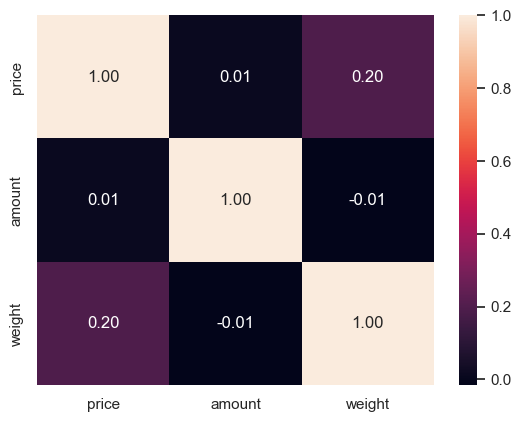

In [ ]:
print('CORRELACIONES ENTRE LAS VARIABLES NUMÉRICAS:')

df_correlation_numericas = df_numericas.corr().round(3)
print(df_correlation_numericas)

print('PAIRPLOT DE LAS CORRELACIONES ENTRE LAS VARIABLES NUMÉRICAS:')

sns.heatmap(df_correlation_numericas, annot=True, fmt=".2f")

sns.set_palette("husl")

plt.show()

###  <span style="color:Fuchsia">Exercici 2: Implementa un jointplot.</span>

In [ ]:
df_numericas_decline=df_transtoproducts[['price', 'amount', 'weight', 'declined']]
df_numericas_decline

,price,amount,weight,declined
0,161.11,466.92,1.0,0
1,60.33,466.92,0.6,0
2,103.73,466.92,2.7,0
3,59.80,49.53,0.6,0
4,82.15,49.53,2.7,0
...,...,...,...,...
1452,114.09,200.72,1.0,0
1453,26.66,42.32,1.0,0
1454,169.96,219.83,2.7,0
1455,59.80,219.83,0.6,0


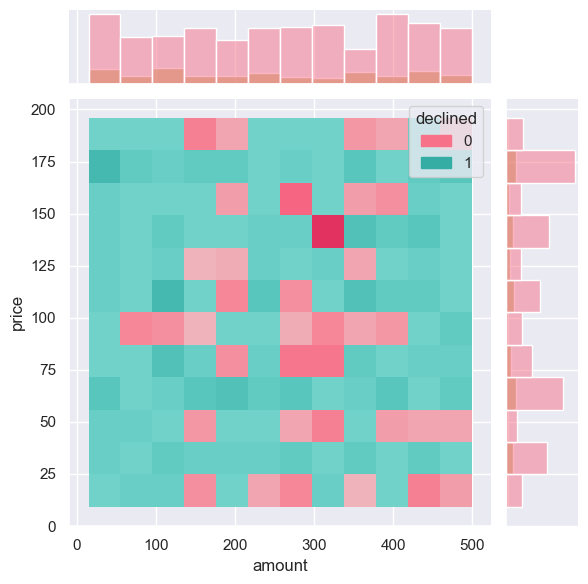

In [ ]:
sns.jointplot(data=df_numericas_decline, x="amount", y="price", hue="declined", kind="hist", palette='husl')

## <span style="color:Fuchsia">Nivell 3</span>

###  <span style="color:Fuchsia">Exercici 1 (N3): Implementa un violinplot combinat amb un altre tipus de gràfic.</span>

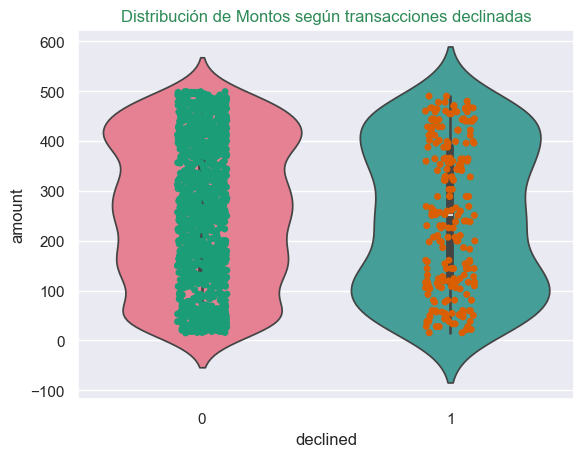

In [ ]:
sns.violinplot(x="declined", y="amount", hue='declined', data=df_products_to_companies, palette='husl', legend=False)
sns.stripplot(x="declined", y="amount", hue='declined', data=df_products_to_companies,palette='Dark2', jitter=True, legend=False)
plt.title('Distribución de Montos según transacciones declinadas', color='seagreen')
plt.show()

En esta distribución de transacciones declinadas según sus montos podemos ver que las transacciones declinadas se sitúan mayoritariamente entre los precios cercanos a los 100 euros, y sobre los 400 euros.  En cambio, las transacciones que fueron aceptadas tienen una mayor concentración sobre los 400 euros. En resumen, podríamos decir que hay mayor cantidad de declinadas en el rango de montos por transacción que ronda los 100 euros.

###  <span style="color:Fuchsia">Exercici 2 (N3): Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament.</span>

In [ ]:
df_products_to_companies.head()

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,colour,weight,warehouse_id,company_id,company_name,phone,email,country,website,Continente
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,#7c7c7c,1.0,WH-4\r,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r,North America
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,#3f3f3f,0.6,WH--14\r,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r,North America
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,#424242,2.7,WH--66\r,b-2362,Lorem Eu Incorporated,01 83 66 62 07,enim.gravida.sit@hotmail.net,Canada,https://baidu.com/en-ca\r,North America
3,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,#5b5b5b,0.6,WH--38\r,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r,Europe
4,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,#919191,2.7,WH--42\r,b-2302,Nunc Interdum Incorporated,05 18 15 48 13,non@outlook.com,Germany,https://wikipedia.org/en-us\r,Europe


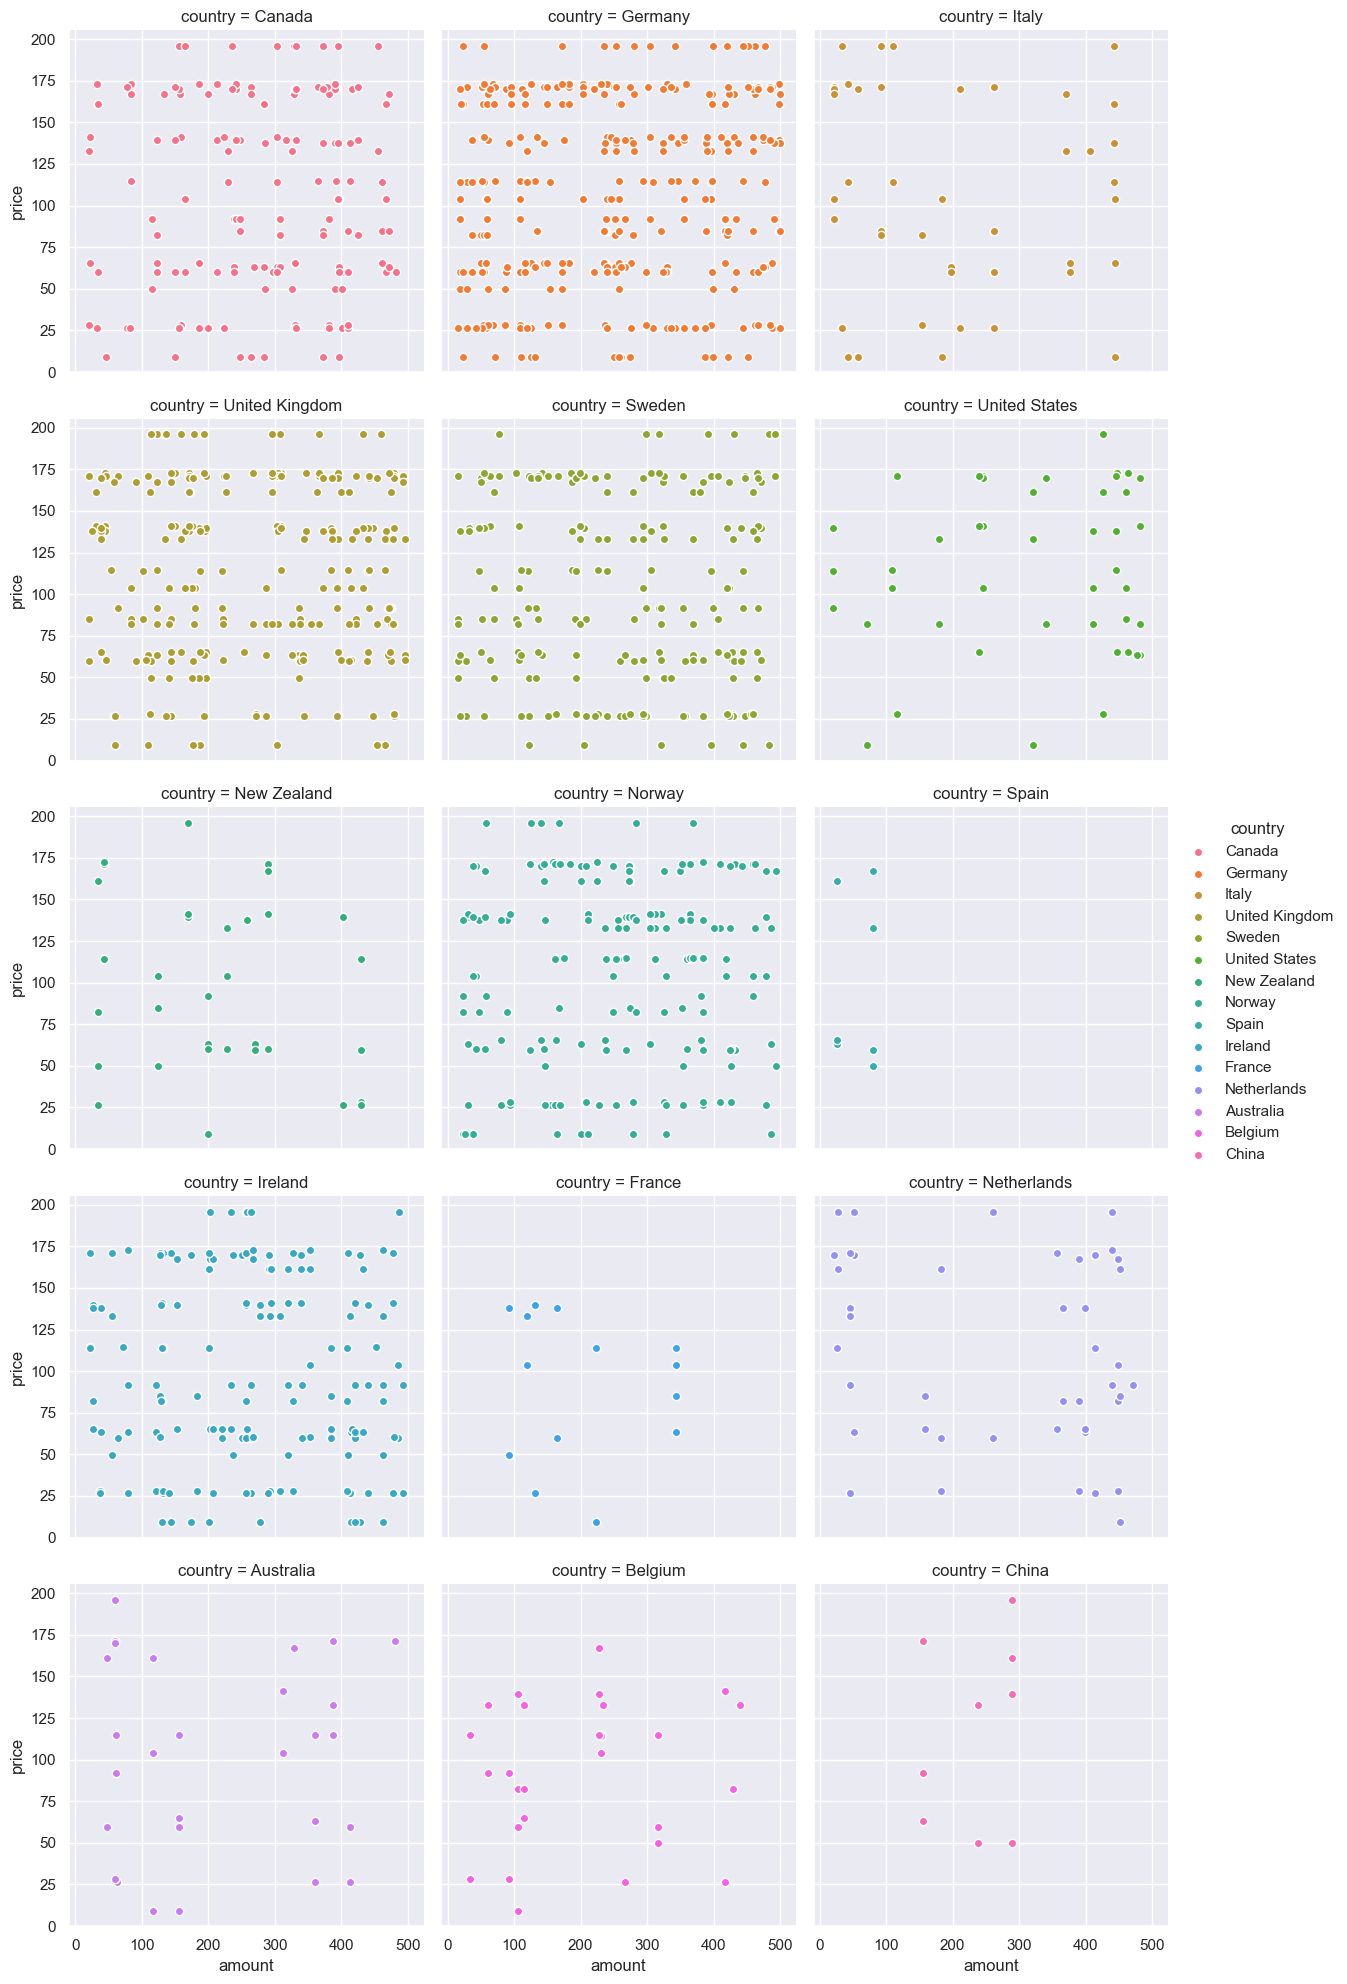

In [ ]:

graph = sns.FacetGrid(df_products_to_companies, col="country", hue="country", height=4, col_wrap=3)
graph.map(plt.scatter, "amount", "price", edgecolor="w").add_legend()



Y por Continente para ver más limpios los datos


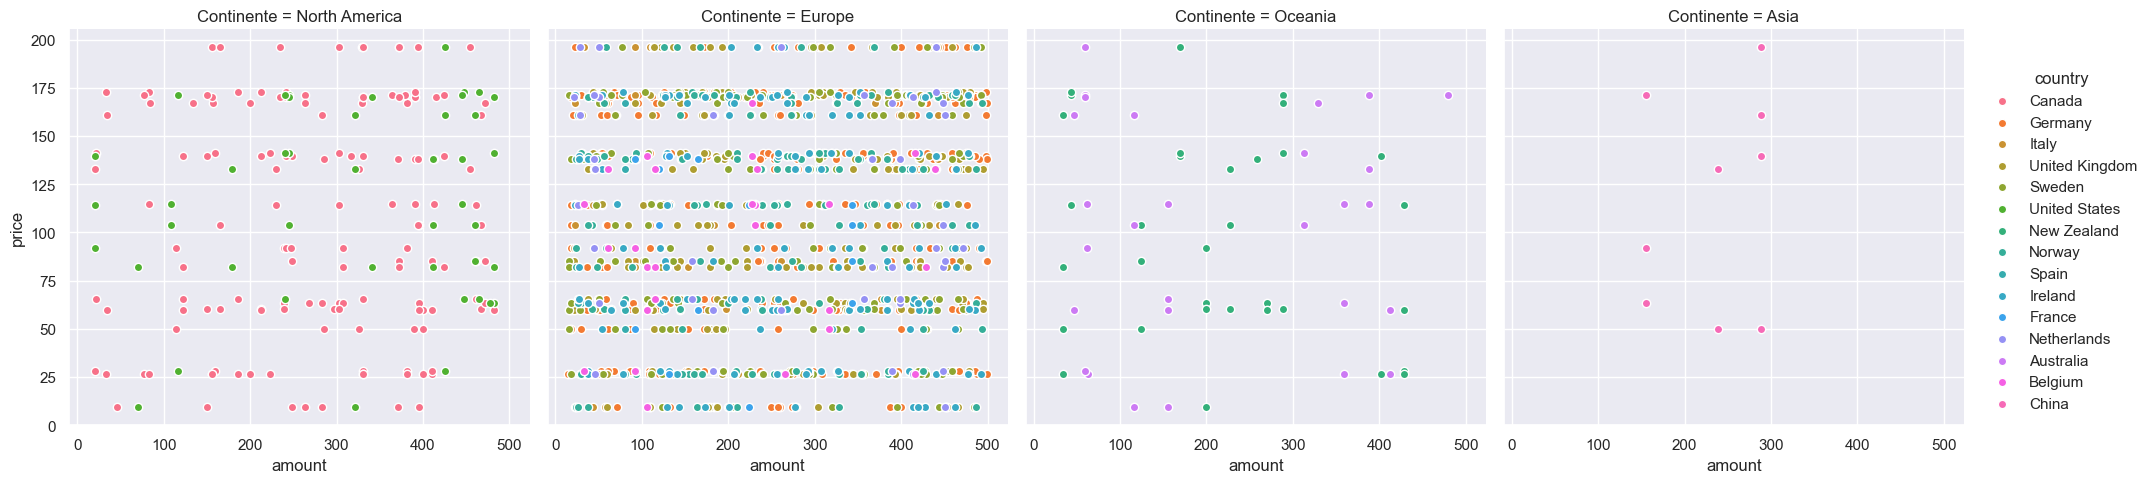

In [ ]:
graph = sns.FacetGrid(df_products_to_companies, col="Continente", hue="country", height=5, col_wrap=4)

graph.map(plt.scatter, "amount", "price", edgecolor="w").add_legend()
plt.show()

In [ ]:
df_users_to_companies.head()

,id_x,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,id,name,surname,phone_y,email_y,birth_date,country_y,city,postal_code,address
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,92,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."
1,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,92,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."
2,02C6201E-D90A-1859-B4EE-88D2986D3B02,CcU-2938,b-2362,2021-08-28 23:42:24,466.92,0,"71, 1, 19",92,81.9185,-12.5276,...,92,Lynn,Riddle,1-387-885-4057,vitae.aliquet@outlook.edu,"Sep 21, 1984",United States,Bozeman,61871,"P.O. Box 712, 7907 Est St."
3,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,170,William,Benjamin,0800 1111,porttitor@icloud.ca,"May 15, 1987",United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.
4,0466A42E-47CF-8D24-FD01-C0B689713128,CcU-4219,b-2302,2021-07-26 07:29:18,49.53,0,"47, 97, 43",170,-43.9695,-117.5250,...,170,William,Benjamin,0800 1111,porttitor@icloud.ca,"May 15, 1987",United Kingdom,Coldstream,KY0 0DY,662-8112 Praesent Av.


Dejamos uno más pero con histograma porque el Power BI no hace FacetGrid con Scatters

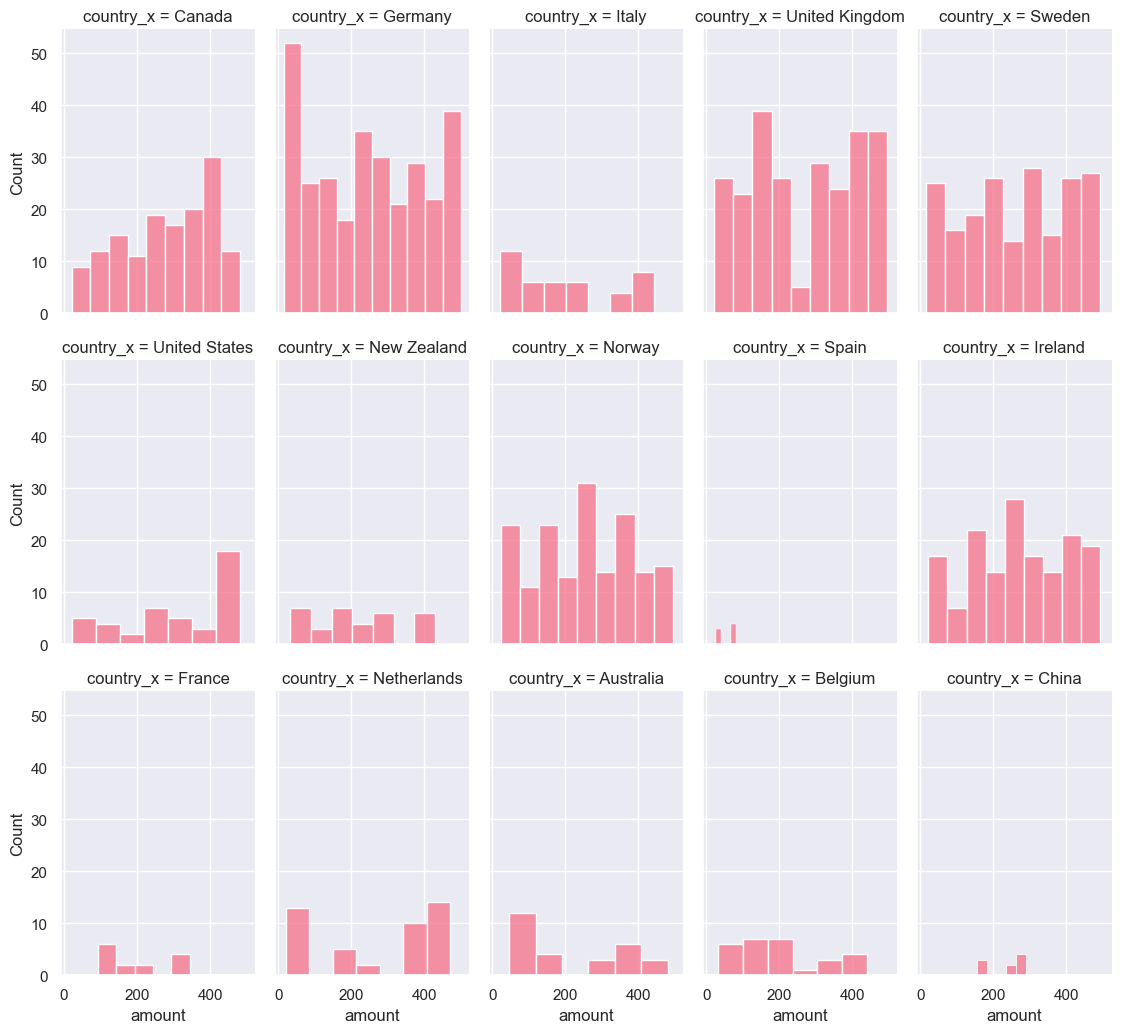

In [ ]:
g = sns.FacetGrid(df_users_to_companies, col="country_x", height=3.5, aspect=.65, col_wrap=5)
g.map(sns.histplot, "amount", stat='count')

### <span style="color:orange">¡¡¡ y así terminamos los ejercicios del Sprint 8.1!!!:</span>

#### https://www.youtube.com/watch?v=zNyjdHZ9xgY&ab_channel=agustingerez